In [27]:
import pandas as pd
import numpy as np
import csv
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

In [28]:
gemini = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/csv_folder/camaroes_gemini_stars.csv")
sia = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/csv_folder/camaroes_sia_stars.csv")
caminho = "/content/drive/MyDrive/Machine Learning Project/csv_folder/arquivo.csv"

In [29]:
print(f"Comentários totais: {len(sia)}")
print(f"Quantos comentários foram analisados pelo Gemini: {len(gemini)}")

Comentários totais: 16387
Quantos comentários foram analisados pelo Gemini: 300


In [30]:
gemini.head()

,Número do Comentário,Estrelas Gemini
0,1,5
1,2,5
2,3,5
3,4,4
4,5,5


In [31]:
sia.head()

,Index,Coments_norm,Estrelas SIA,Estrelas,Polarity Scores
0,1,perfect restaurant fair price well served wonderful food arrived straight away opened empty able choose table everything left must 30 people waiting enter international shrimp 3 people eat,5,5,"{'neg': 0.049, 'neu': 0.575, 'pos': 0.375, 'compound': 0.8979}"
1,2,excellent restaurant beautiful environment clean pleasant dishes tasty well served value money excellent first visit ate ceviche fish shrimp delicious lobster black tip perfect second day ate ceviche worth shrimp 294 starter super well served,5,5,"{'neg': 0.0, 'neu': 0.383, 'pos': 0.617, 'compound': 0.9883}"
2,3,excellent place new experiences shrimp dishes meat fast attentive service come back often,4,5,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5719}"
3,4,best restaurant ever cost benefit ok surreal food delicious dessert naked nest heart already 4 times would go back thousand,5,5,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.9201}"
4,5,busy restaurant lots celebrations delicious delicious dishes good price attentive friendly staff,5,4,"{'neg': 0.0, 'neu': 0.372, 'pos': 0.628, 'compound': 0.926}"


In [32]:
stars = sia[["Index","Estrelas"]]
stars

,Index,Estrelas
0,1,5
1,2,5
2,3,5
3,4,5
4,5,4
...,...,...
16382,16383,4
16383,16384,5
16384,16385,5
16385,16386,5


In [33]:
stars_sia = sia[["Index","Estrelas SIA"]]
stars_sia

,Index,Estrelas SIA
0,1,5
1,2,5
2,3,4
3,4,5
4,5,5
...,...,...
16382,16383,5
16383,16384,4
16384,16385,5
16385,16386,5


In [34]:
stars_gemini = gemini[["Número do Comentário", "Estrelas Gemini"]]
#stars_gemini["Estrelas Gemini"] = stars_gemini["Estrelas Gemini"].str.replace(r"\bestrela[s]?\b", "", regex=True)
stars_gemini

,Número do Comentário,Estrelas Gemini
0,1,5
1,2,5
2,3,5
3,4,4
4,5,5
...,...,...
295,11045,5
296,11046,5
297,11047,Sem avaliação (comentário irrelevante)
298,11048,4


In [35]:
import pandas as pd

stars_gemini = stars_gemini.rename(columns={'Número do Comentário': 'Index'})

# juntando os DataFrames usando 'Index' como chave
merged_df = pd.merge(stars, stars_sia, on='Index')
merged_df = pd.merge(merged_df, stars_gemini, on='Index')

# renomeando as colunas
merged_df = merged_df.rename(columns={
    'Estrelas': 'Estrelas_Reais',
    'Estrelas SIA': 'Estrelas_SIA',
    'Estrelas Gemini': 'Estrelas_Gemini'
})

# Exibir o DataFrame mesclado
merged_df

,Index,Estrelas_Reais,Estrelas_SIA,Estrelas_Gemini
0,1,5,5,5
1,2,5,5,5
2,3,5,4,5
3,4,5,5,4
4,5,4,5,5
...,...,...,...,...
295,11045,5,5,5
296,11046,5,5,5
297,11047,5,5,Sem avaliação (comentário irrelevante)
298,11048,5,3,4


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Converter as colunas para inteiros
merged_df['Estrelas_Reais'] = pd.to_numeric(merged_df['Estrelas_Reais'], errors='coerce').fillna(-1).astype(int)
merged_df['Estrelas_Gemini'] = pd.to_numeric(merged_df['Estrelas_Gemini'], errors='coerce').fillna(-1).astype(int)
merged_df['Estrelas_SIA'] = pd.to_numeric(merged_df['Estrelas_SIA'], errors='coerce').fillna(-1).astype(int)

stars_sia['Estrelas_SIA'] = pd.to_numeric(stars_sia['Estrelas SIA'], errors='coerce').fillna(-1).astype(int)
stars['Estrelas_SIA'] = pd.to_numeric(stars['Estrelas'], errors='coerce').fillna(-1).astype(int)

# Definir todas as classes de estrelas
all_star_labels = [1, 2, 3, 4, 5]

# Matrizes de confusão
cm_gemini = confusion_matrix(merged_df['Estrelas_Reais'], merged_df['Estrelas_Gemini'], labels=all_star_labels)
cm_sia = confusion_matrix(merged_df['Estrelas_Reais'], merged_df['Estrelas_SIA'], labels=all_star_labels)
cm_sia_all = confusion_matrix(stars['Estrelas'], stars_sia['Estrelas SIA'], labels=all_star_labels)
cm_sia_x_gemini = confusion_matrix(merged_df['Estrelas_Gemini'], merged_df['Estrelas_SIA'], labels=all_star_labels)

sia_filtered = sia[sia['Index'].isin(gemini['Número do Comentário'])]

cm_sia_filtered = confusion_matrix(
    sia_filtered['Estrelas'],
    sia_filtered['Estrelas SIA'],
    labels=all_star_labels
)

# Acurácia para o Gemini e SIA
acc_gemini = accuracy_score(merged_df['Estrelas_Reais'], merged_df['Estrelas_Gemini'])
acc_sia = accuracy_score(merged_df['Estrelas_Reais'],merged_df['Estrelas_SIA'])
acc_sia_all = accuracy_score(stars['Estrelas'], stars_sia['Estrelas SIA'])
acc_sia_x_gemini = accuracy_score(merged_df['Estrelas_Gemini'],merged_df['Estrelas_SIA'])

print("\nAcurácia - Gemini:", acc_gemini)
print("Acurácia - SIA:", acc_sia)
print("Acurácia - SIA - Todas:", acc_sia_all)
print("Acurácia - Gemini x SIA:", acc_sia_x_gemini)

# Outras métricas de classificação (precisão, recall, F1-score)
print("\nRelatório de Classificação - Gemini:\n", classification_report(merged_df['Estrelas_Reais'], merged_df['Estrelas_Gemini'], zero_division=1))
print("\nRelatório de Classificação - SIA:\n", classification_report(merged_df['Estrelas_Reais'], merged_df['Estrelas_SIA'], zero_division=1))
print("\nRelatório de Classificação - SIA - Todas:\n", classification_report(stars['Estrelas'], stars_sia['Estrelas SIA'], zero_division=1))
print("\nRelatório de Classificação - Gemini x SIA:\n", classification_report(merged_df['Estrelas_Gemini'],merged_df['Estrelas_SIA'], zero_division=1))



Acurácia - Gemini: 0.66
Acurácia - SIA: 0.69
Acurácia - SIA - Todas: 0.7023860377128212
Acurácia - Gemini x SIA: 0.6166666666666667

Relatório de Classificação - Gemini:
               precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.09      0.08      0.08        13
           4       0.10      0.12      0.11        41
           5       0.82      0.79      0.80       244

    accuracy                           0.66       300
   macro avg       0.17      0.33      0.17       300
weighted avg       0.68      0.66      0.67       300


Relatório de Classificação - SIA:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.00      0.00         1
           3       0.00      0.00      0.00        13
           4       0.20      0.3

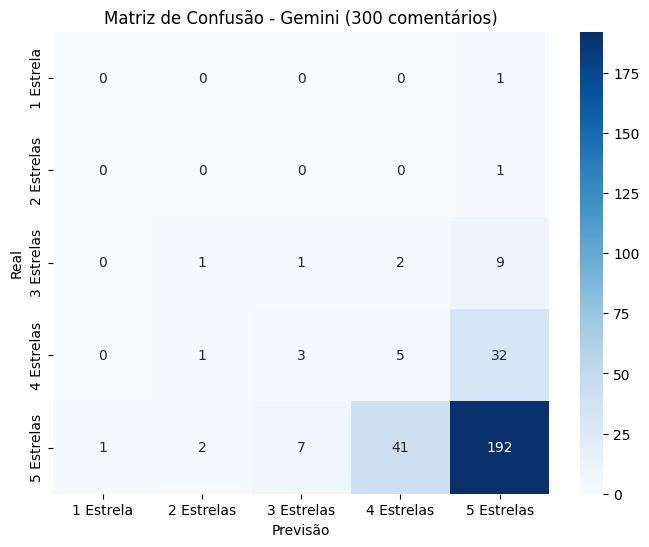

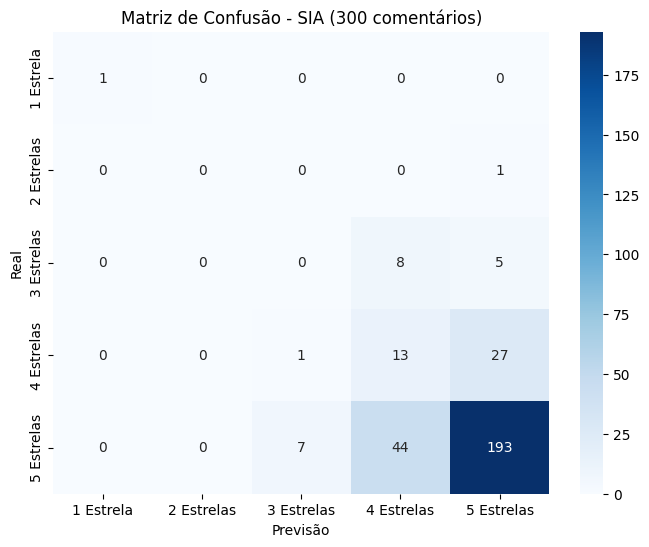

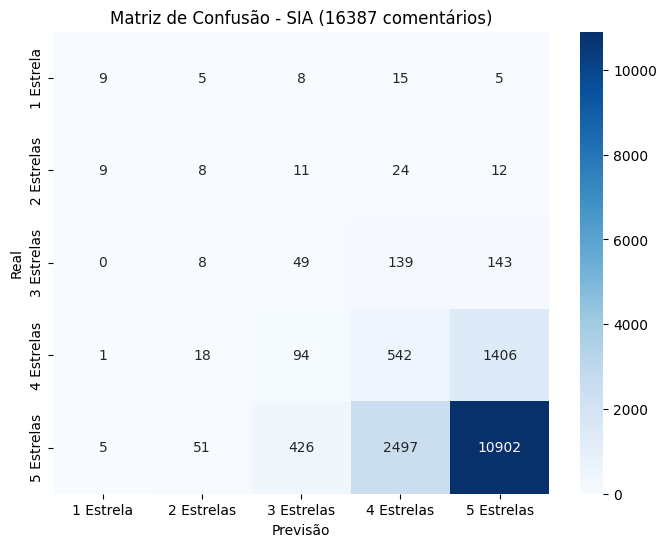

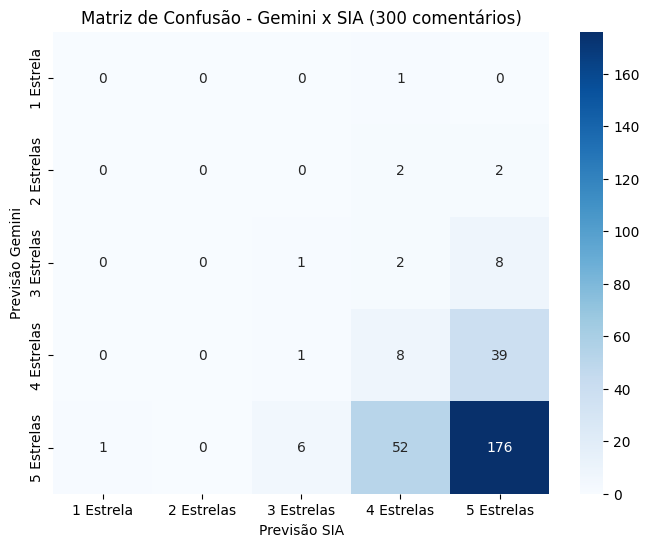

In [60]:
def plot_confusion_matrix(cm, labels, title, eixox, eixoy):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(eixox)
    plt.ylabel(eixoy)
    plt.title(title)
    plt.show()

# Labels para as classes de estrelas
star_labels = ['1 Estrela', '2 Estrelas', '3 Estrelas', '4 Estrelas', '5 Estrelas']

# Plotar a matriz de confusão para o Gemini
plot_confusion_matrix(cm_gemini, star_labels, f'Matriz de Confusão - Gemini ({len(gemini)} comentários)', "Previsão", "Real")
print("\n")

# Plotar a matriz de confusão pelo SIA (mesmos comentarios do gemini)
plot_confusion_matrix(cm_sia_filtered, star_labels, f'Matriz de Confusão - SIA ({len(gemini)} comentários)', "Previsão", "Real")
print("\n")

# Plotar a matriz de confusão para tudo do SIA
plot_confusion_matrix(cm_sia_all, star_labels, f'Matriz de Confusão - SIA ({len(sia)} comentários)', "Previsão", "Real")
print("\n")

# Plotar a matriz de confusão do Gemini x SIA
plot_confusion_matrix(cm_sia_x_gemini, star_labels, f'Matriz de Confusão - Gemini x SIA ({len(gemini)} comentários)', "Previsão SIA", "Previsão Gemini")

In [38]:
cm_gemini

array([[  0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   1],
       [  0,   1,   1,   2,   9],
       [  0,   1,   3,   5,  32],
       [  1,   2,   7,  41, 192]])

In [59]:
def calculate_modified_accuracy(df, prediction_col, actual_col):
    correct_predictions = 0
    total_predictions = len(df)

    for index, row in df.iterrows():
        predicted_stars = row[prediction_col]
        actual_stars = row[actual_col]
        if abs(predicted_stars - actual_stars) == 0:
            correct_predictions += 1
        if abs(predicted_stars - actual_stars) == 1:
            correct_predictions += 0.8
    return correct_predictions / total_predictions

modified_accuracy_gemini = calculate_modified_accuracy(merged_df, 'Estrelas_Gemini', 'Estrelas_Reais')
modified_accuracy_sia = calculate_modified_accuracy(merged_df, 'Estrelas_SIA', 'Estrelas_Reais')
modified_accuracy_sia_all = calculate_modified_accuracy(sia, 'Estrelas SIA', 'Estrelas')

print(f"Modified Accuracy - Gemini - {len(gemini)} comentários: {modified_accuracy_gemini}")
print(f"Modified Accuracy - SIA - {len(gemini)} comentários: {modified_accuracy_sia}")
print(f"Modified Accuracy - SIA - {len(sia)} comentários: {modified_accuracy_sia_all}")

300
300
16387
Modified Accuracy - Gemini - 300 comentários: 0.8706666666666681
Modified Accuracy - SIA - 300 comentários: 0.9033333333333344
Modified Accuracy - SIA - 16387 comentários: 0.9059132238969202
